## ***Name : `Fawad Ali Shaikh`***
## ***Task 4: `House Price Prediction`***
## ***Linkedin : [Fawad Ali](https://www.linkedin.com/in/fawad-ali5)***

In [71]:
!pip install kaggle -q

In [72]:
from google.colab import files

# 1. Upload the file
print("Please select the 'kaggle.json' file to upload:")
files.upload()

# 2. Move the file and set permissions
# This creates the .kaggle folder and moves the file there
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
# This command changes the file permissions to be read/write only by the user
! chmod 600 ~/.kaggle/kaggle.json

print("\nAuthentication successful!")

Please select the 'kaggle.json' file to upload:


Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists

Authentication successful!


In [73]:
! kaggle competitions download house-prices-advanced-regression-techniques


  0% 0.00/199k [00:00<?, ?B/s]
100% 199k/199k [00:00<00:00, 594MB/s]


In [74]:
import zipfile
import os

# 1. Define the name of the zip file (adjust this to your dataset name)
# The ZIP file name is usually the dataset_name part of the command.
zip_file_name = 'house-prices-advanced-regression-techniques.zip'

# 2. Unzip the file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('.') # Extracts all files to the current directory

# 3. Clean up the zip file (optional)
os.remove(zip_file_name)

print(f"\nFiles extracted. Check the file browser on the left for your data!")


Files extracted. Check the file browser on the left for your data!


### ***Import Libraries***

In [111]:
# To handle data
import pandas as pd
import numpy as np

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# For ML tasks
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import GradientBoostingRegressor


# To ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [76]:
# dispaly all columns & rows

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [77]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## ***Lets do EDA `(Exploratory Data Analysis)`***

In [78]:
# Shape of dataset

df_train.shape

(1460, 81)

In [79]:
print('In Train dataset')
print(f'Number of rows: {df_train.shape[0]}')
print(f'Number of columns: {df_train.shape[1]}')


In Train dataset
Number of rows: 1460
Number of columns: 81


In [80]:
# columns in train

df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [81]:
# Information about train dataset

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [82]:
# Summary of train dataset

df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [83]:
# Unique values in train datset

print('Unique values in Train dataset\n')
print(df_train.nunique())

Unique values in Train dataset

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
Street              2
Alley               2
LotShape            4
LandContour         4
Utilities           2
LotConfig           5
LandSlope           3
Neighborhood       25
Condition1          9
Condition2          8
BldgType            5
HouseStyle          8
OverallQual        10
OverallCond         9
YearBuilt         112
YearRemodAdd       61
RoofStyle           6
RoofMatl            8
Exterior1st        15
Exterior2nd        16
MasVnrType          3
MasVnrArea        327
ExterQual           4
ExterCond           5
Foundation          6
BsmtQual            4
BsmtCond            4
BsmtExposure        4
BsmtFinType1        6
BsmtFinSF1        637
BsmtFinType2        6
BsmtFinSF2        144
BsmtUnfSF         780
TotalBsmtSF       721
Heating             6
HeatingQC           5
CentralAir          2
Electrical          5
1stFlrSF          753


In [84]:
# check null values in percentage

print(df_train.isnull().sum().sort_values(ascending=False)/len(df_train)*100)

PoolQC           99.520548
MiscFeature      96.301370
Alley            93.767123
Fence            80.753425
MasVnrType       59.726027
FireplaceQu      47.260274
LotFrontage      17.739726
GarageQual        5.547945
GarageFinish      5.547945
GarageType        5.547945
GarageYrBlt       5.547945
GarageCond        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtCond          2.534247
BsmtQual          2.534247
BsmtFinType1      2.534247
MasVnrArea        0.547945
Electrical        0.068493
Condition2        0.000000
BldgType          0.000000
Neighborhood      0.000000
LandSlope         0.000000
LotConfig         0.000000
Condition1        0.000000
LandContour       0.000000
LotShape          0.000000
Street            0.000000
LotArea           0.000000
MSSubClass        0.000000
MSZoning          0.000000
Id                0.000000
Utilities         0.000000
HouseStyle        0.000000
Foundation        0.000000
ExterQual         0.000000
ExterCond         0.000000
B

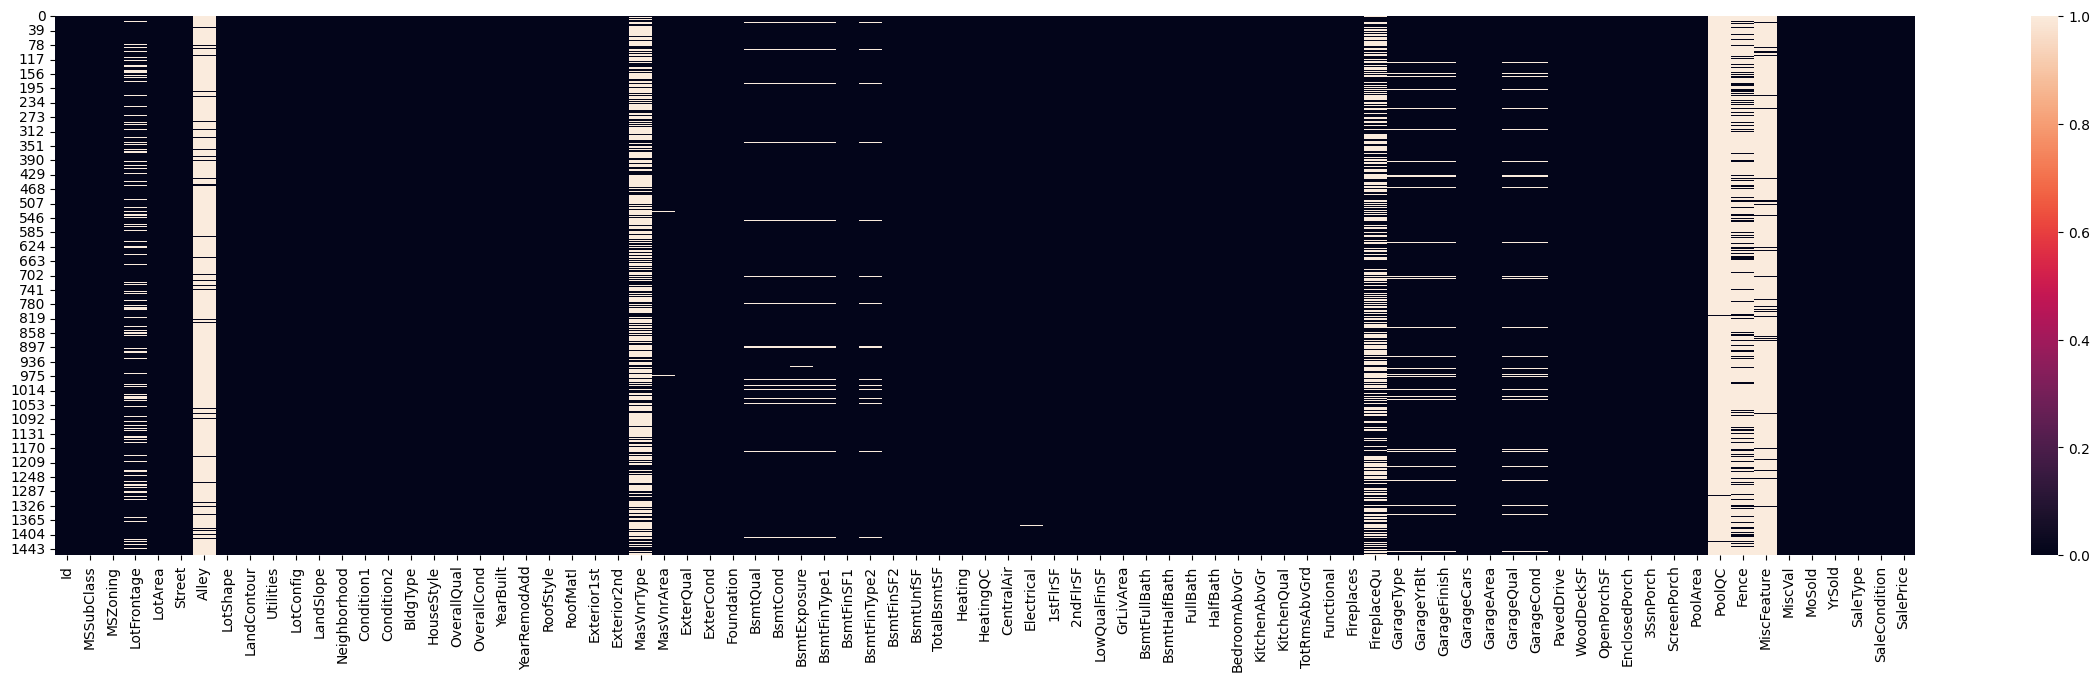

In [85]:
# plot it using seaborn

fig = plt.figure(figsize=(30,7))
sns.heatmap(df_train.isnull())
plt.show()

In [86]:
# plot it using plotly (Train)

fig = px.imshow(df_train.isnull())
fig.update_layout(title='<b><i>Heatmap of Train dataset</i></b>')
fig.show()

## ***Remove Null Values***

In [87]:
# list down the columns that contains null values in train dataset (percentage)

print(df_train.isnull().sum().sort_values(ascending=False)[df_train.isnull().sum()>0]/len(df_train)*100)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageYrBlt      5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtCond         2.534247
BsmtQual         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


***So these are the columns that have `null values` in the dataset***

***So these are the columns that have `null values` in test dataset***

In [88]:
# Drop columns in train dataset with >50% missing values

missing_train = df_train.isnull().sum().sort_values(ascending=False)[df_train.isnull().sum()>0]/len(df_train)*100
columns_to_drop = missing_train[missing_train > 50].index
df_train.drop(columns=columns_to_drop, axis=1, inplace=True)


In [89]:
# Shape of the dataset after removing columns

df_train.shape

(1460, 76)

In [90]:
# Null values in train dataset

print('Null values in dataset\n')
print(df_train.isnull().sum().sort_values(ascending=False)[df_train.isnull().sum()>0]/len(df_train)*100)

Null values in dataset

FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageQual       5.547945
GarageFinish     5.547945
GarageType       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64


### ***Spilit columns based on their datatypes***

In [91]:
# Separate numeric and categorical columns on train dataset

numeric_cols = df_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df_train.select_dtypes(include=['object']).columns.tolist()

print(f"Numeric columns: {len(numeric_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")

Numeric columns: 38
Categorical columns: 38


### ***Impute Numerical vlaues using KNN***

In [92]:
# Impute missing values in numerical columns using KNN

knn_imputer = KNNImputer(n_neighbors=5)
df_train[numeric_cols] = knn_imputer.fit_transform(df_train[numeric_cols])


In [93]:
# Impute missing values in categorical columns using the most frequent value

simple_imputer = SimpleImputer(strategy='most_frequent')
df_train[categorical_cols] = simple_imputer.fit_transform(df_train[categorical_cols])


In [94]:
# drop FireplaceQu column

df_train.drop('FireplaceQu',axis=1,inplace=True)


In [95]:
# Check null values in train datsets

print('Null values in Train dataset\n')
print(df_train.isnull().sum().sort_values(ascending=False))

Null values in Train dataset

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
K

***So we have impute all `null values`***

## ***Pre-Processing***

In [96]:
# columns that have datatype categorical (Train)

categorical_cols = df_train.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {len(categorical_cols)}")

Categorical columns: 37


In [97]:
# Encode categorical features using Label Encoder

label_encoders = {}
for column in categorical_cols:
    le = LabelEncoder()
    df_train[column] = le.fit_transform(df_train[column].astype(str))
    label_encoders[column] = le

In [98]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,3,65.0,8450.0,1,3,3,0,4,0,5,2,2,0,5,7.0,5.0,2003.0,2003.0,1,1,12,13,196.0,2,4,2,2,3,3,2,706.0,5,0.0,150.0,856.0,1,0,1,4,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,2,8.0,6,0.0,1,2003.0,1,2.0,548.0,4,4,2,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,8,4,208500.0
1,2.0,20.0,3,80.0,9600.0,1,3,3,0,2,0,24,1,2,0,2,6.0,8.0,1976.0,1976.0,1,1,8,8,0.0,3,4,1,2,3,1,0,978.0,5,0.0,284.0,1262.0,1,0,1,4,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,3,6.0,6,1.0,1,1976.0,1,2.0,460.0,4,4,2,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,8,4,181500.0
2,3.0,60.0,3,68.0,11250.0,1,0,3,0,4,0,5,2,2,0,5,7.0,5.0,2001.0,2002.0,1,1,12,13,162.0,2,4,2,2,3,2,2,486.0,5,0.0,434.0,920.0,1,0,1,4,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,2,6.0,6,1.0,1,2001.0,1,2.0,608.0,4,4,2,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,8,4,223500.0
3,4.0,70.0,3,60.0,9550.0,1,0,3,0,0,0,6,2,2,0,5,7.0,5.0,1915.0,1970.0,1,1,13,15,0.0,3,4,0,3,1,3,0,216.0,5,0.0,540.0,756.0,1,2,1,4,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,2,7.0,6,1.0,5,1998.0,2,3.0,642.0,4,4,2,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,8,0,140000.0
4,5.0,60.0,3,84.0,14260.0,1,0,3,0,2,0,15,2,2,0,5,8.0,5.0,2000.0,2000.0,1,1,12,13,350.0,2,4,2,2,3,0,2,655.0,5,0.0,490.0,1145.0,1,0,1,4,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,2,9.0,6,1.0,1,2000.0,1,3.0,836.0,4,4,2,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,8,4,250000.0


In [99]:
df_train.shape

(1460, 75)

In [100]:
df_train.corr()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.011156,-0.006096,0.002953,-0.033226,0.008916,0.032122,-0.019659,0.013324,0.049756,0.005847,-0.013735,-0.003815,0.001839,0.021912,0.018111,-0.028365,0.012609,-0.012713,-0.021998,0.038675,-0.022562,-0.034694,-0.042847,-0.048481,0.001689,0.029826,0.008514,0.051070,0.006762,-0.024613,0.014204,-0.005024,0.045159,-0.005968,-0.007940,-0.015415,0.042120,0.002157,0.009821,0.037632,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,-0.004432,0.027239,-0.001064,-0.019772,0.000195,0.006896,-0.011390,0.016570,0.017634,-0.003230,-0.018025,0.005971,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,0.019773,-0.005806,-0.021917
MSSubClass,0.011156,1.000000,0.035900,-0.378717,-0.139781,-0.024969,0.119289,-0.002940,-0.022844,0.075910,-0.025672,-0.005985,-0.024762,-0.042395,0.746063,0.397161,0.032628,-0.059316,0.027850,0.040581,-0.117817,-0.031336,-0.089159,-0.137229,0.021409,-0.017161,-0.003254,0.058126,-0.041065,-0.013652,-0.064221,0.016599,-0.069836,0.041195,-0.065649,-0.140759,-0.238518,0.048009,0.020760,-0.101774,0.051945,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.010129,0.040380,0.003711,-0.045569,0.090719,0.072154,0.012301,-0.040110,-0.098672,0.007630,0.002927,-0.059925,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.084284
MSZoning,-0.006096,0.035900,1.000000,-0.107362,-0.034452,0.087654,0.061887,-0.017854,-0.001192,-0.009895,-0.022055,-0.249679,-0.027874,0.044606,0.005690,-0.105315,-0.160099,0.186951,-0.308908,-0.174728,-0.000301,0.005133,-0.008558,0.006963,-0.065507,0.200536,-0.096041,-0.235174,0.128245,-0.010528,0.037209,0.024688,-0.049128,-0.031718,0.028086,-0.046749,-0.087834,0.056866,0.134279,-0.049523,-0.070818,-0.055614,-0.051481,0.011520,-0.082615,-0.018526,0.007193,-0.198290,-0.133876,-0.016471,0.049434,0.128976,-0.043200,-0.095722,-0.011349,0.116007,-0.270965,0.167501,-0.157042,-0.189250,-0.150802,-0.083272,-0.100366,-0.009477,-0.154704,0.115509,0.000362,0.019089,-0.003128,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.166872
LotFrontage,0.002953,-0.378717,-0.107362,1.000000,0.410927,-0.061129,-0.188812,-0.085622,0.013764,-0.216374,0.130050,0.082071,0.005234,0.010519,-0.455897,0.044868,0.224945,-0.026436,0.099325,0.060167,0.150348,0.115136,0.053379,0.078295,0.178595,-0.167329,0.034713,0.084262,-0.146091,0.049615,-0.136014,-0.047636,0.232177,-0.048660,0.064284,0.111898,0.377725,-0.028485,-0.064088,0.077561,0.071404,0.447328,0.081669,0.031951,0.399893,0.110471,0.006617,0.189609,0.056238,0.257598,-0.006058,-0.173706,0.350064,0.012579,0.282216,-0.228544,0.062839,-0.219857,0.280093,0.341006,0.050011,0.039073,0.081516,0.104437,0.150028,0.017754,0.072408,0.038208,0.186361,0.012426,-0.004833,0.004130,-0.033898,0.053068,0.357165
LotArea,-0.033226,-0.139781,-0.034452,0.410927,1.000000,-0.197131,-0.165315,-0.149083,0.010123,-0.121161,0.436868,0.044569,0.023846,0.022164,-0.205721,-0.033190,0.105806,-0.005636,0.014228,0.013788,0.077054,0.149837,0.004256,-0.003930,0.105118,-0.057275,0.015160,-0.011081,-0.065150,0.012366,-0.141043,-0.061880,0.214103,-0

In [101]:
# create heatmap

plt.figure(figsize=(40,15))
sns.heatmap(df_train.corr(),annot=True)
plt.show()



Output hidden; open in https://colab.research.google.com to view.

## ***Machine Learning***

In [102]:
# Define features and target

X = df_train.drop(['Id', 'SalePrice'], axis=1)
y = df_train['SalePrice']



In [103]:
# Split data into train & test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### ***Gradient Boosting***

In [104]:
gb = GradientBoostingRegressor(random_state=42, n_estimators=100)
gb.fit(X_train, y_train)

# Predict on validation set
y_pred_rf = gb.predict(X_test)

# Evaluate Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"Gradient Bosting (RMSE) : {rmse_rf}")

Gradient Bosting (RMSE) : 27913.716536402662


In [105]:
test_predictions = gb.predict(X_test)
print(test_predictions)

[145807.69851484 344920.11254264 116928.60079067 157147.19180584
 333274.47833585  86560.88830727 219679.32086659 140012.46253484
  89619.13690155 128299.62364516 156772.36318401 125533.79735233
 125631.74949524 198626.80969041 169956.04651697 134067.00771091
 191983.72745985 136996.47007042 113349.85766412 210195.61581089
 172934.85969626 221000.64671049 171272.31777291 131519.85102939
 196972.50062286 163253.40193532 195001.96303946 110838.14525924
 178972.48822795 199770.76939106 130283.9607638  249508.38842237
 229851.98976644 115293.92311561 248249.58891575 152923.52443844
 124983.5534612  211182.80014092 319968.76387318 102202.87029004
 128437.91699821 242241.06433448 120368.46296536 382569.72698566
 125547.19984719 137390.97374758 113291.99030572 129475.71379193
 421915.36847049 128285.2538165  118685.23057817 206874.50449061
 114189.57809543 369145.67617069 142144.61876441 237625.96169284
 187099.36783579 164394.44625823 142682.20204036 110972.36088901
  77644.78560611 154894.3

In [106]:
# Train Gradient Boosting

gbr = GradientBoostingRegressor(random_state=42, n_estimators=100, learning_rate=0.1)
gbr.fit(X_train, y_train)

# Predict on validation set
y_pred_gbr = gbr.predict(X_test)

# evaluate the model
print('MAE = ', mean_squared_error(y_test, y_pred_gbr))
print('R2 = ', r2_score(y_test, y_pred_gbr))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred_gbr)))

MAE =  779175570.8746394
R2 =  0.8984168926030096
RMSE =  27913.716536402662


### ***Hyperparameter Tuning***

In [107]:
# Hyperparameter tuning for Gradient Boosting

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
best_gbr = grid_search.best_estimator_

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [108]:
# Train Gradient Boosting

gbr = GradientBoostingRegressor(random_state=42, n_estimators=200, learning_rate=0.1,max_depth= 5)
gbr.fit(X_train, y_train)

# Predict on validation set
y_pred_gbr = gbr.predict(X_test)

# evaluate the model
print('MAE = ', mean_absolute_error(y_test, y_pred_gbr))
print('R2 = ', r2_score(y_test, y_pred_gbr))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred_gbr)))


MAE =  16089.687745840522
R2 =  0.9143660554127546
RMSE =  25628.89559447223


- ***So, the R2 score is `0.91` which is good, MAE is `16089.68` and RMSE is `25628.89`***

In [109]:
# Create a DataFrame for easy plotting and comparison
predictions_df = pd.DataFrame({
    'Actual SalePrice': y_test,
    'Predicted SalePrice': y_pred_gbr
}, index=X_test.index)

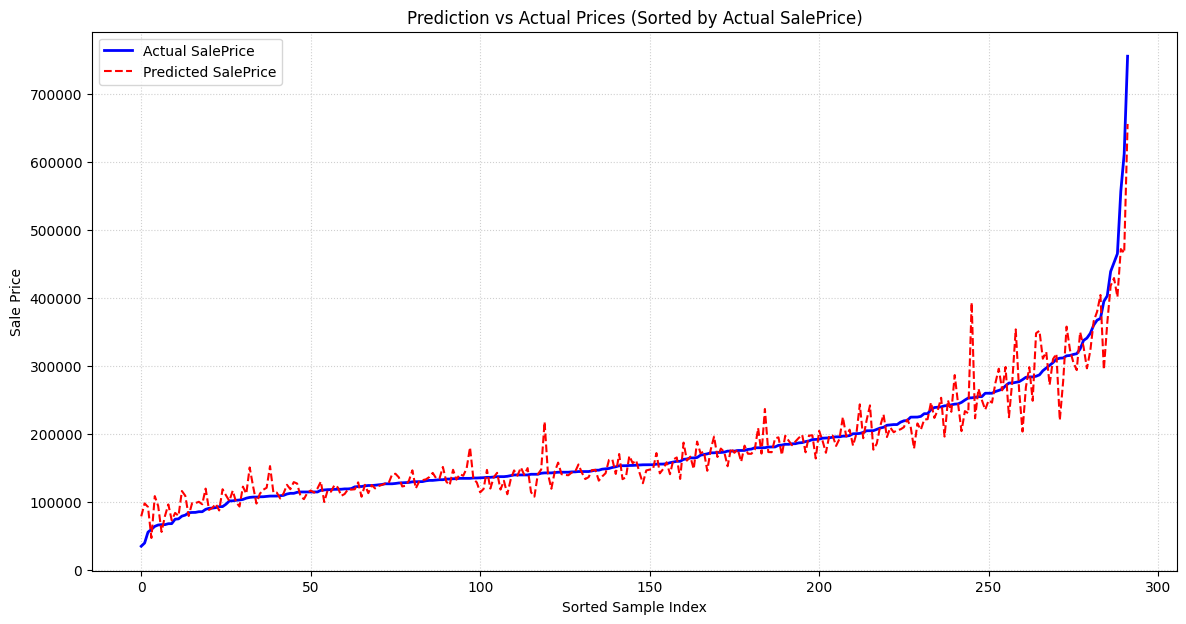

In [110]:
# This makes it easier to see how predictions perform across the range of actual prices
predictions_df_sorted = predictions_df.sort_values(by='Actual SalePrice').reset_index(drop=True)

# Create the plot
plt.figure(figsize=(14, 7)) # Set the figure size for better readability

# Plot the actual sale prices
plt.plot(predictions_df_sorted.index,
         predictions_df_sorted['Actual SalePrice'],
         label='Actual SalePrice',
         color='blue',
         linewidth=2)

# Plot the predicted sale prices
plt.plot(predictions_df_sorted.index,
         predictions_df_sorted['Predicted SalePrice'],
         label='Predicted SalePrice',
         color='red',
         linestyle='--',
         linewidth=1.5)

# Add title and labels for clarity
plt.title('Prediction vs Actual Prices (Sorted by Actual SalePrice)')
plt.xlabel('Sorted Sample Index') # Using a generic index after sorting
plt.ylabel('Sale Price')

# Display legend and grid
plt.legend()
plt.grid(True, which='both', linestyle=':', alpha=0.6)
plt.show()